## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [56]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [69]:
df_train=pd.read_csv("Titanic_train.csv")
df_test=pd.read_csv("Titanic_test.csv")
df_train["Age"][df_train["Age"].isnull()]
missing=df_train.iloc[np.where(df_train["Age"].isnull())[0]]
missing.drop_duplicates(inplace=True)
missing[["Sex","Pclass","Age"]]

C:\Users\rober\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
...,...,...,...
859,male,3,NaN
863,female,3,NaN
868,male,3,NaN
878,male,3,NaN


C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

不同Pclass與對應的Sex有不同的年齡分布情況


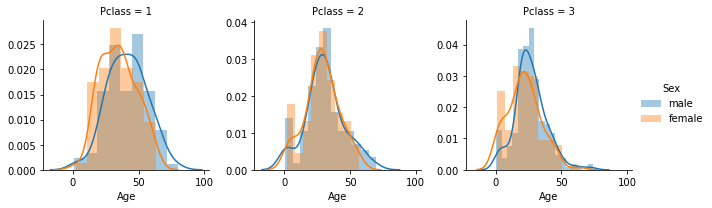

In [83]:
#step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?，
g = sns.FacetGrid(data=df_train,hue='Sex', col = 'Pclass',sharey=False)
g.map(sns.distplot, 'Age')
g.add_legend()
print('不同Pclass與對應的Sex有不同的年齡分布情況')

## 觀察 Age

C:\Users\rober\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


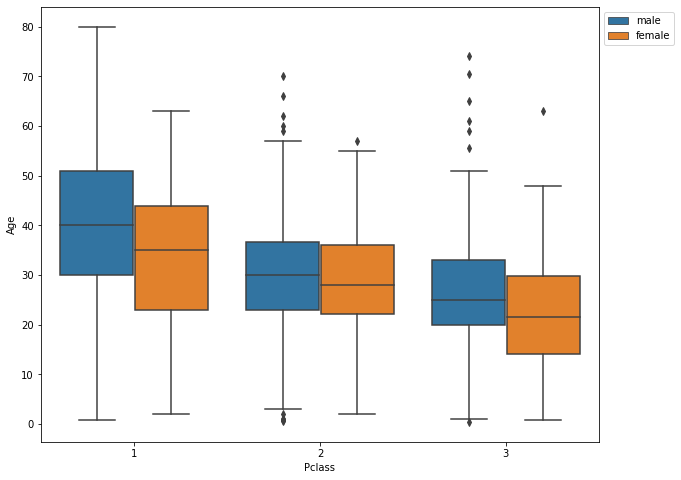

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot("Pclass","Age",hue="Sex",data=df_train)
plt.legend(bbox_to_anchor=(1,.5,.5,.5),loc="upper left")

In [64]:
#Step1：離散轉連續型資料
#下面三行程式，讓 Male=1, FeMale-0.

from sklearn import preprocessing
print(df_train[['Sex',"Pclass"]])
le = preprocessing.LabelEncoder()
#df_train['Pclass']=le.fit_transform(df_train['Pclass'])
df_train['Sex']=le.fit_transform(df_train['Sex'])
print(df_train[['Sex',"Pclass"]])
data=df_train[['Age','Pclass','Sex']]
data

     Sex  Pclass
0      1       2
1      0       0
2      0       2
3      0       0
4      1       2
..   ...     ...
886    1       1
887    0       0
888    0       2
889    1       0
890    1       2

[891 rows x 2 columns]
     Sex  Pclass
0      1       2
1      0       0
2      0       2
3      0       0
4      1       2
..   ...     ...
886    1       1
887    0       0
888    0       2
889    1       0
890    1       2

[891 rows x 2 columns]


,Age,Pclass,Sex
0,22.0,2,1
1,38.0,0,0
2,26.0,2,0
3,35.0,0,0
4,35.0,2,1
...,...,...,...
886,27.0,1,1
887,19.0,0,0
888,NaN,2,0
889,26.0,0,1


In [65]:
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [67]:
# KNN
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data),columns=["Age","Pclass","Sex"])
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,Age,Pclass,Sex
0,22.0,2.0,1.0
1,38.0,0.0,0.0
2,26.0,2.0,0.0
3,35.0,0.0,0.0
4,35.0,2.0,1.0
...,...,...,...
886,27.0,1.0,1.0
887,19.0,0.0,0.0
888,26.0,2.0,0.0
889,26.0,0.0,1.0
